Found 16504 images belonging to 15 classes.
Found 2064 images belonging to 15 classes.
Found 2070 images belonging to 15 classes.


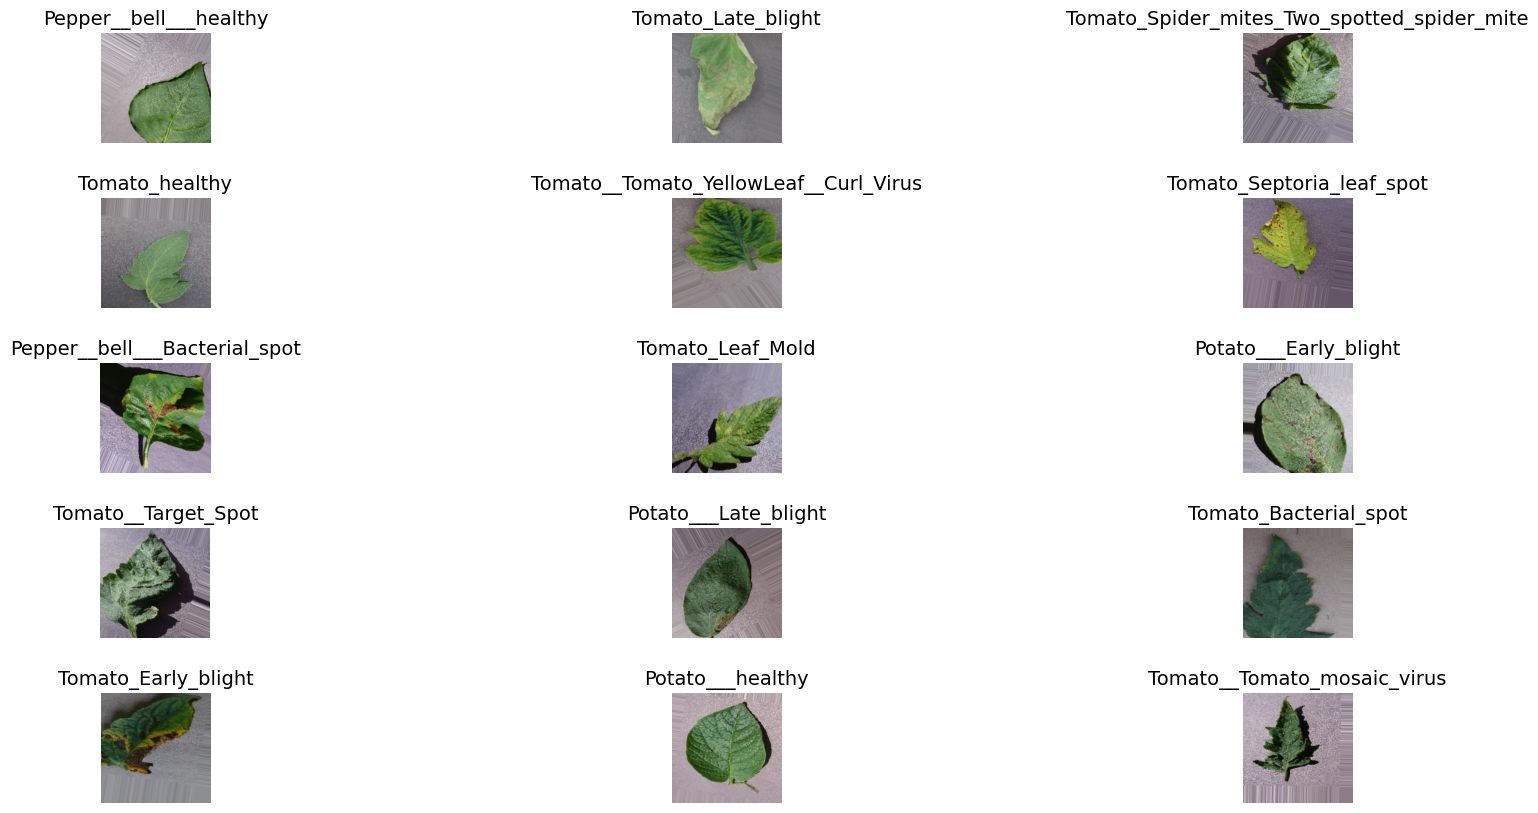

In [4]:
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc

%run DataPre.ipynb

In [5]:

input_shape = (224, 224, 3)


num_classes = 15  

# Load DenseNet model pre-trained on ImageNet
def build_densenet(input_shape, num_classes):
    base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=input_shape)
    
    # Freeze the layers of the base model
    for layer in base_model.layers:
        layer.trainable = False
    
    # Add custom top layers
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.5)(x)
    x = Dense(512, activation='relu')(x)
    predictions = Dense(num_classes, activation='softmax')(x)

    # Construct the model
    model = Model(inputs=base_model.input, outputs=predictions)
    
    return model

model_densenet = build_densenet(input_shape, num_classes)

29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 9s 0us/step


In [6]:

model_densenet.compile(optimizer=Adam(learning_rate=0.0001),
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

In [7]:

early_stopping = EarlyStopping(
    monitor='val_loss',  
    patience=3,          
    restore_best_weights=True 
)

In [ ]:
# Summary of the model
#model_densenet.summary()

In [8]:
# Train the model
history_densenet = model_densenet.fit(
    train_generator,
    validation_data=val_generator,
    epochs=50,
    callbacks=[early_stopping]
)

c:\Users\youse\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1118s 2s/step - accuracy: 0.2922 - loss: 2.2736 - val_accuracy: 0.7122 - val_loss: 1.0034
Epoch 2/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1008s 2s/step - accuracy: 0.6057 - loss: 1.2152 - val_accuracy: 0.7892 - val_loss: 0.7045
Epoch 3/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1016s 2s/step - accuracy: 0.6798 - loss: 0.9807 - val_accuracy: 0.8115 - val_loss: 0.6124
Epoch 4/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 992s 2s/step - accuracy: 0.7038 - loss: 0.8924 - val_accuracy: 0.8406 - val_loss: 0.5474
Epoch 5/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 911s 2s/step - accuracy: 0.7127 - loss: 0.8616 - val_accuracy: 0.8537 - val_loss: 0.5162
Epoch 6/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 962s 2s/step - accuracy: 0.7251 - loss: 0.8324 - val_accuracy: 0.8590 - val_loss: 0.4982
Epoch 7/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 943s 2s/step - accuracy: 0.7337 - loss: 0.7943 - val_accuracy: 0.8522 - val_loss: 0.4995
Epoch 8/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 868s 2s/step - accuracy: 0.7382 - loss: 0.7656 - val_a

In [9]:
# Save the model
model_densenet.save('densenet_plantvillage.keras')

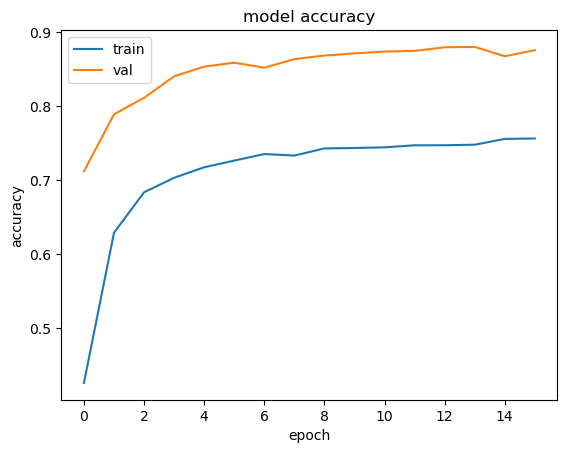

In [10]:
plt.plot(history_densenet.history['accuracy'])
plt.plot(history_densenet.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

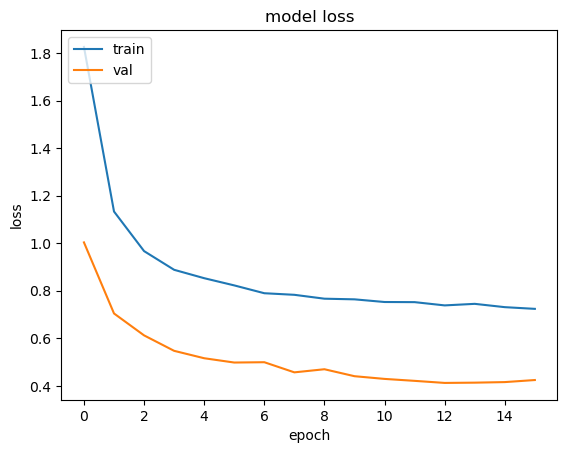

In [11]:
plt.plot(history_densenet.history['loss'])
plt.plot(history_densenet.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [12]:
# Evaluate the model
test_loss_densenet, test_acc_densenet = model_densenet.evaluate(test_generator)
print(f"Test Accuracy for DenseNet: {test_acc_densenet:.2f}")

65/65 ━━━━━━━━━━━━━━━━━━━━ 85s 1s/step - accuracy: 0.9044 - loss: 0.3162
Test Accuracy for DenseNet: 0.88


65/65 ━━━━━━━━━━━━━━━━━━━━ 87s 1s/step


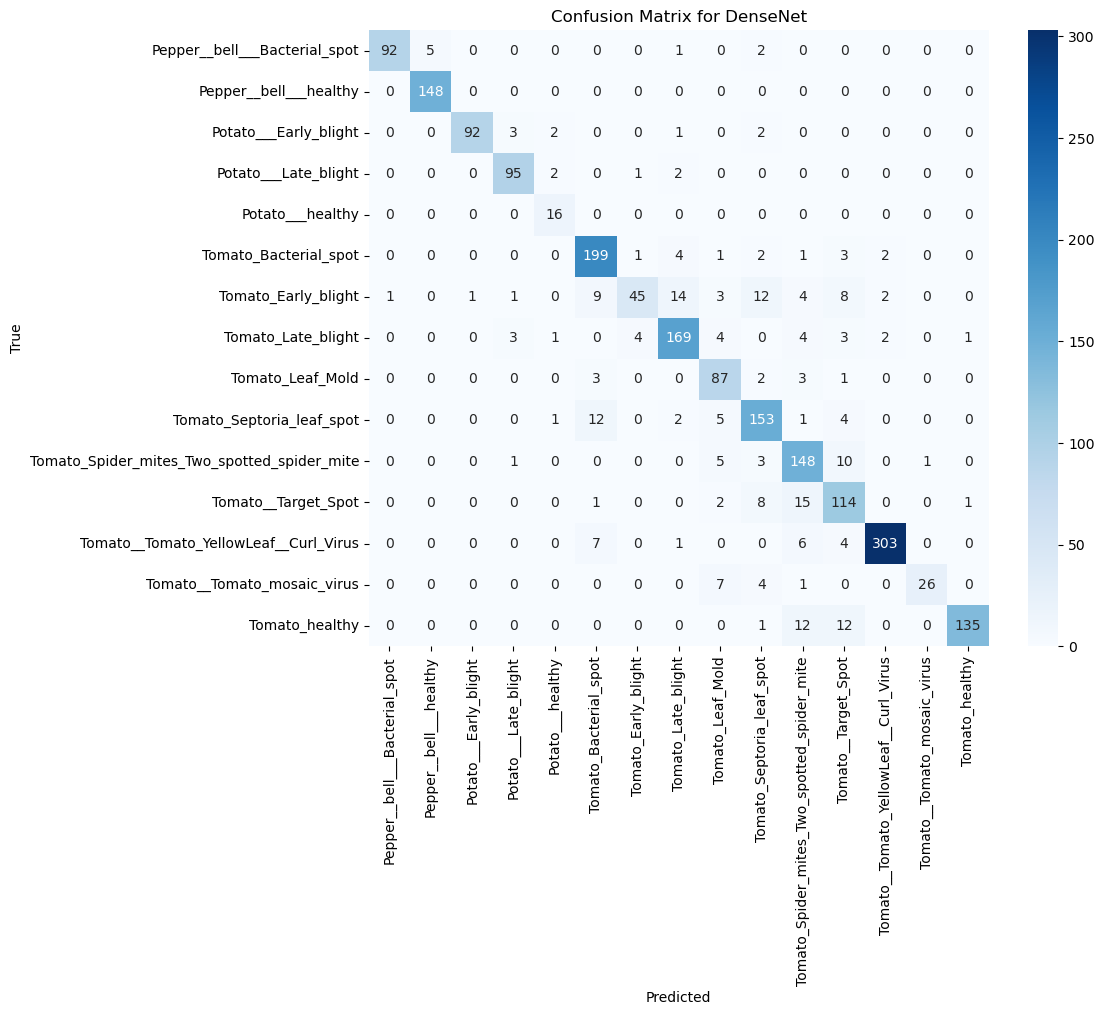

Classification Report for DenseNet:
                                              precision    recall  f1-score   support

              Pepper__bell___Bacterial_spot       0.99      0.92      0.95       100
                     Pepper__bell___healthy       0.97      1.00      0.98       148
                      Potato___Early_blight       0.99      0.92      0.95       100
                       Potato___Late_blight       0.92      0.95      0.94       100
                           Potato___healthy       0.73      1.00      0.84        16
                      Tomato_Bacterial_spot       0.86      0.93      0.90       213
                        Tomato_Early_blight       0.88      0.45      0.60       100
                         Tomato_Late_blight       0.87      0.88      0.88       191
                           Tomato_Leaf_Mold       0.76      0.91      0.83        96
                  Tomato_Septoria_leaf_spot       0.81      0.86      0.83       178
Tomato_Spider_mites_Two_spo

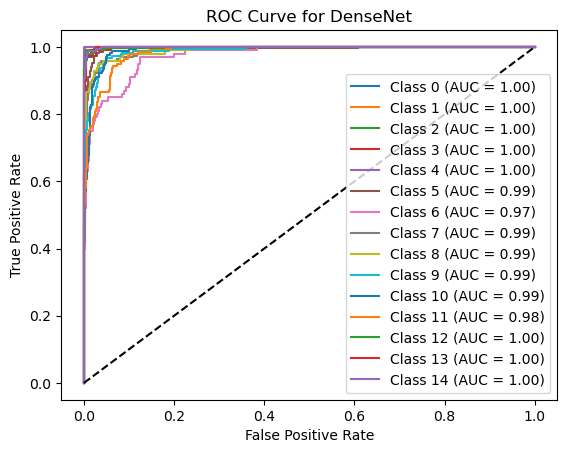

In [13]:

y_true = test_generator.classes  


predictions_densenet = model_densenet.predict(test_generator)
y_pred_densenet = np.argmax(predictions_densenet, axis=1) 

# Confusion Matrix
conf_matrix_densenet = confusion_matrix(y_true, y_pred_densenet)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_densenet, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for DenseNet')
plt.show()

# Classification Report
report_densenet = classification_report(y_true, y_pred_densenet, target_names=test_generator.class_indices.keys())
print("Classification Report for DenseNet:\n", report_densenet)

# ROC and AUC
# one-vs-rest manner
from sklearn.preprocessing import label_binarize

# Binarize the true labels
y_true_bin = label_binarize(y_true, classes=np.arange(len(test_generator.class_indices)))

# Get the ROC curve and AUC for each class
fpr_densenet, tpr_densenet, roc_auc_densenet = {}, {}, {}
for i in range(len(test_generator.class_indices)):
    fpr_densenet[i], tpr_densenet[i], _ = roc_curve(y_true_bin[:, i], predictions_densenet[:, i])
    roc_auc_densenet[i] = auc(fpr_densenet[i], tpr_densenet[i])

# Plot ROC curve for each class
plt.figure()
for i in range(len(test_generator.class_indices)):
    plt.plot(fpr_densenet[i], tpr_densenet[i], label=f'Class {i} (AUC = {roc_auc_densenet[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--') 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for DenseNet')
plt.legend(loc='lower right')
plt.show()
